In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('ErrorLog_Ver3/errorlog0601_0614_edit.csv')  
df2 = pd.read_csv('ErrorLog_Ver3/errorlog0615_0630_edit.csv')  
df3 = pd.read_csv('ErrorLog_Ver3/errorlog0701_0715_edit.csv')  
df4 = pd.read_csv('ErrorLog_Ver3/errorlog0716_0730_edit.csv')  
df5 = pd.read_csv('ErrorLog_Ver3/errorlog0731_0814_edit.csv')  
df6 = pd.read_csv('ErrorLog_Ver3/errorlog0815_0828_edit.csv')  
df7 = pd.read_csv('ErrorLog_Ver3/errorlog0829_0831_edit.csv')  

df = pd.concat([df1,df2,df3,df4,df5,df6,df7],axis=0, ignore_index=True)
print(df.shape)
df.head(5)

(12169809, 15)


,EventTime,SessionID,UserID,ErrorEventID,Channel,Country,LV,VipLV,UDID,State,Machine,TotalBet,FeverState,PublishVer,CurChannel
0,1591685860,3d48d3fcd61ee231db62a2c43ef62a50,2020110517651012,51509999,1,TW,999,4,"""36A58D4F-CB6C-4A7C-B126-A391CE7CEDAF""",MACHINE,114.0,0.0,NONE,"""9.8.6""",1.0
1,1591685860,3d48d3fcd61ee231db62a2c43ef62a50,2020110517651012,12150,1,TW,999,4,"""36A58D4F-CB6C-4A7C-B126-A391CE7CEDAF""",MACHINE,114.0,0.0,NONE,"""9.8.6""",1.0
2,1591685023,dcd2bfd1ddefb16708789a0e4323cda5,2020110513281012,4716002,1,TW,999,2,"""2233ECA1-A30F-4A9A-9FA1-30B0E285A97B""",MACHINE,130.0,0.0,NONE,"""9.8.6""",1.0
3,1591681945,eb689200531704e41ff9b3665becd317,2020110512131012,8028,3,TW,70,6,c860005a54708320,LOADING,198.0,0.0,NONE,"""9.8.7""",2.0
4,1591671218,6e72fe3f74dd0899547aab7a942924f2,2020110523061012,51519999,2,TW,999,6,84d6d768d2ca3801,MACHINE,105.0,0.0,NONE,"""9.8.7""",2.0


In [18]:
months = list(range(6, 9))
# dates = list(range(1, 32))
hours = list(range(0, 24))

error_date = []
error_count = []

for month in months:
    if month == 6:
        dates = list(range(1, 31))
    elif month == 7 | month == 8:
        dates = list(range(1, 32))
    print(dates)
    for date in dates:
        for hour in hours:
            start = datetime(2020, month, date, hour, 0, 0, 0)
            end = datetime(2020, month, date, hour, 59, 59, 999999)

            e = df[df["EventTime"] <= end.timestamp()]    
            e = e[e["EventTime"] >= start.timestamp()]
            t = f"{month:02d}{date:02d}-{hour:02d}~{(hour+1):02d}"
            print(t)
            error_count.append(e["EventTime"].count())
            error_date.append(t)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
0601-00~01
0601-01~02
0601-02~03
0601-03~04
0601-04~05
0601-05~06
0601-06~07
0601-07~08
0601-08~09
0601-09~10
0601-10~11
0601-11~12
0601-12~13
0601-13~14
0601-14~15
0601-15~16
0601-16~17
0601-17~18
0601-18~19
0601-19~20
0601-20~21
0601-21~22
0601-22~23
0601-23~24
0602-00~01
0602-01~02
0602-02~03
0602-03~04
0602-04~05
0602-05~06
0602-06~07
0602-07~08
0602-08~09
0602-09~10
0602-10~11
0602-11~12
0602-12~13
0602-13~14
0602-14~15
0602-15~16
0602-16~17
0602-17~18
0602-18~19
0602-19~20
0602-20~21
0602-21~22
0602-22~23
0602-23~24
0603-00~01
0603-01~02
0603-02~03
0603-03~04
0603-04~05
0603-05~06
0603-06~07
0603-07~08
0603-08~09
0603-09~10
0603-10~11
0603-11~12
0603-12~13
0603-13~14
0603-14~15
0603-15~16
0603-16~17
0603-17~18
0603-18~19
0603-19~20
0603-20~21
0603-21~22
0603-22~23
0603-23~24
0604-00~01
0604-01~02
0604-02~03
0604-03~04
0604-04~05
0604-05~06
0604-06~07
0604-07~08
0604-08~

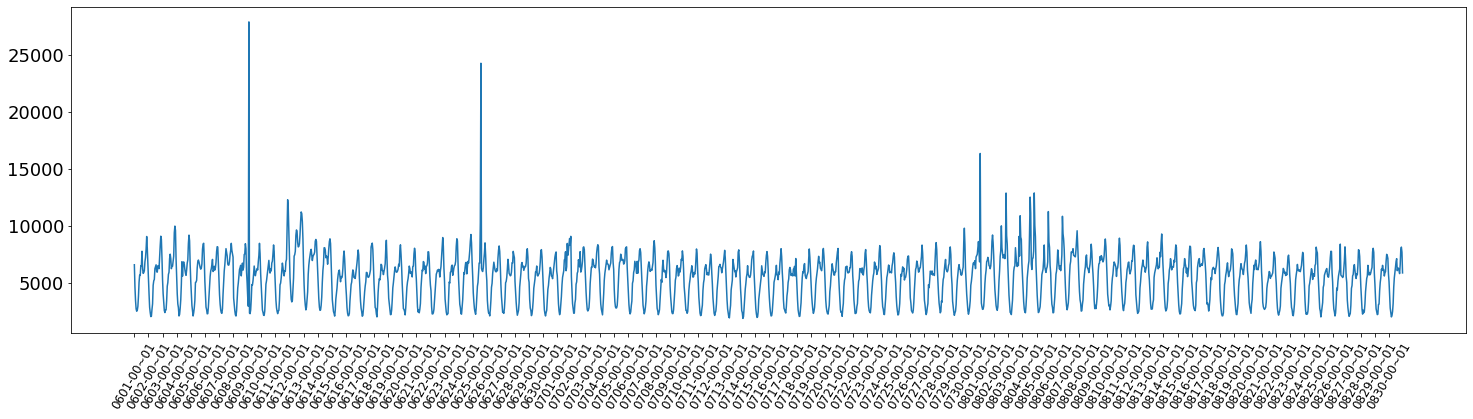

In [23]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [25, 6]
fig = plt.figure()
plt.plot(error_date, error_count)
plt.xticks(error_date[:][::24], fontsize=12, rotation = 60)
plt.yticks(fontsize=18)
plt.show()